In [9]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [10]:
salary=pd.read_csv("Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [11]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
import seaborn as sns
sns.distplot(data['Salary'])

NameError: name 'data' is not defined

In [14]:
# Feature engineering
salary=salary.rename({'YearsExperience':'year','Salary':'income'},axis=1)
salary

,year,income
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='year', ylabel='income'>

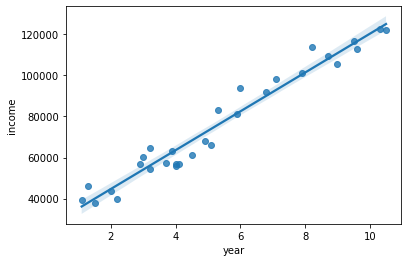

In [15]:
sns.regplot(x=salary['year'],y=salary['income'])

# Model Building

In [16]:
model=smf.ols('income ~ year',data=salary).fit()
model

# Model Testing

In [17]:
#finding coefficient param
model.params

Intercept    25792.200199
year          9449.962321
dtype: float64

In [18]:
#finding tvalues and pvalues
(model.tvalues,'\n',model.pvalues)

(Intercept    11.346940
 year         24.950094
 dtype: float64,
 '\n',
 Intercept    5.511950e-12
 year         1.143068e-20
 dtype: float64)

In [19]:
#finding Rsquared values
(model.rsquared , model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Model prediction

In [20]:
# Automatic Prediction for say sorting time 5, 8
nsalary=pd.Series([5,10,15,20])
nsalary

0     5
1    10
2    15
3    20
dtype: int64

In [21]:
data_pred=pd.DataFrame(nsalary,columns=['year'])
data_pred

,year
0,5
1,10
2,15
3,20


In [22]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
2    167541.635020
3    214791.446628
dtype: float64

In [23]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
2    167541.635020
3    214791.446628
dtype: float64

# improving model using logarithm

In [24]:
salary1=np.log(salary)
salary1

,year,income
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


<AxesSubplot:xlabel='year', ylabel='income'>

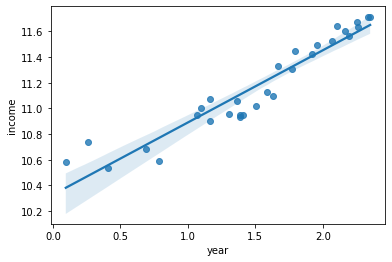

In [25]:
sns.regplot(x='year',y='income',data=salary1)

In [26]:
model = smf.ols('income ~ year',data=salary1).fit()
model

In [27]:
print(model.pvalues,'\n',model.tvalues)

Intercept    9.073132e-45
year         7.395278e-16
dtype: float64 
 Intercept    184.867959
year          16.352542
dtype: float64


In [28]:
(model.rsquared)

0.905215072581715

# Improving model using squarroot transformation

In [29]:
salary.insert(len(salary.columns),'A_sqrt',
             np.sqrt(salary.iloc[:,0]))
salary

,year,income,A_sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [30]:
model = smf.ols('income~A_sqrt',data=salary).fit()
model

In [31]:
model.params

Intercept   -16055.769117
A_sqrt       41500.680583
dtype: float64

In [32]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.262308
A_sqrt       19.437148
dtype: float64 
 Intercept    2.906965e-03
A_sqrt       8.565358e-18
dtype: float64


# improving model with square transformation

In [33]:
salary['Squar_income']=salary.apply(lambda row:row.income**2, axis=1)
salary

,year,income,A_sqrt,Squar_income
0,1.1,39343.0,1.048809,1.547872e+09
1,1.3,46205.0,1.140175,2.134902e+09
2,1.5,37731.0,1.224745,1.423628e+09
3,2.0,43525.0,1.414214,1.894426e+09
4,2.2,39891.0,1.483240,1.591292e+09
5,2.9,56642.0,1.702939,3.208316e+09
6,3.0,60150.0,1.732051,3.618022e+09
7,3.2,54445.0,1.788854,2.964258e+09
8,3.2,64445.0,1.788854,4.153158e+09
9,3.7,57189.0,1.923538,3.270582e+09


In [34]:
model=smf.ols('Squar_income~year',data=salary).fit()
model

In [35]:
model.params

Intercept   -1.609636e+09
year         1.526836e+09
dtype: float64

In [36]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.114661e-04
year         2.152535e-19
dtype: float64 
 Intercept    -3.926574
year         22.352727
dtype: float64


In [37]:
(model.rsquared,model.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

# improving model using BOX-cox transformation

In [38]:
from scipy.stats import boxcox
bcx_target,lam=boxcox(salary['income'])

In [39]:
model=smf.ols('bcx_target~year',data=salary).fit()
model

In [40]:
print(model.pvalues,'\n',model.tvalues)

Intercept    7.255691e-45
year         3.477707e-18
dtype: float64 
 Intercept    186.350884
year          20.117718
dtype: float64


In [41]:
(model.rsquared,model.rsquared_adj)

(0.9352934131758686, 0.9329824636464353)

# improving model using Yeo-Johnson Transformation

In [42]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(salary['income'])

In [40]:
model=smf.ols('yf_target~year',data=salary).fit()

In [43]:
model

In [44]:
model.params

Intercept    15.752114
year          0.283357
dtype: float64

In [45]:
print(model.pvalues,'\n',model.tvalues)

Intercept    7.255691e-45
year         3.477707e-18
dtype: float64 
 Intercept    186.350884
year          20.117718
dtype: float64


In [46]:
(model.rsquared,model.rsquared_adj)

(0.9352934131758686, 0.9329824636464353)